In [ ]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning Libraries
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, roc_curve, auc
from sklearn.feature_selection import RFECV

# Deep Learning Libraries
import tensorflow as tf

# Imbalanced Data Handling
from imblearn.over_sampling import SMOTE

# Visualization Libraries
from matplotlib.colors import ListedColormap

# Ignore warnings for cleaner output
import warnings
warnings.filterwarnings('ignore')

#Load dataset
file_path = './diabetes.csv'  # Update this path as needed
df = pd.read_csv(file_path)

# Display the first few rows
print("First 5 rows of the dataset:")
print(df.head())


First 5 rows of the dataset:
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [ ]:
# Summary statistics
print("\nSummary Statistics:")
print(df.describe())


Summary Statistics:
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000


Missing Values in Each Column:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


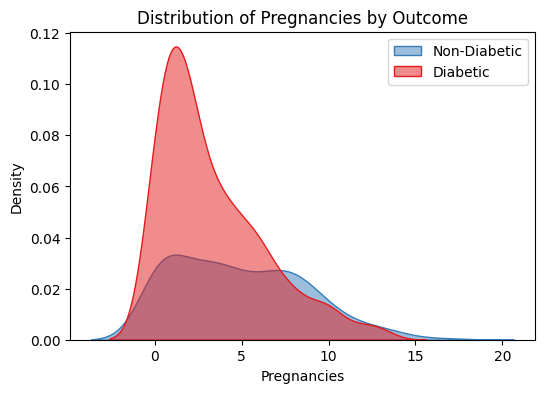

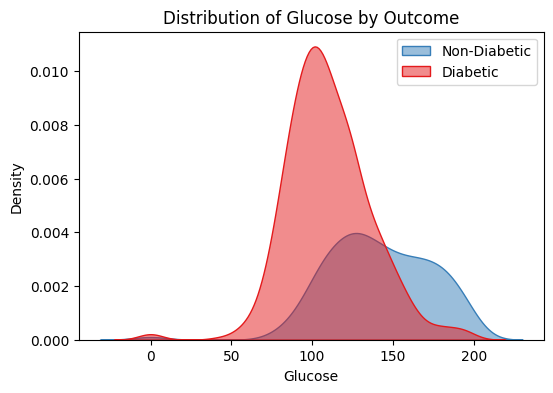

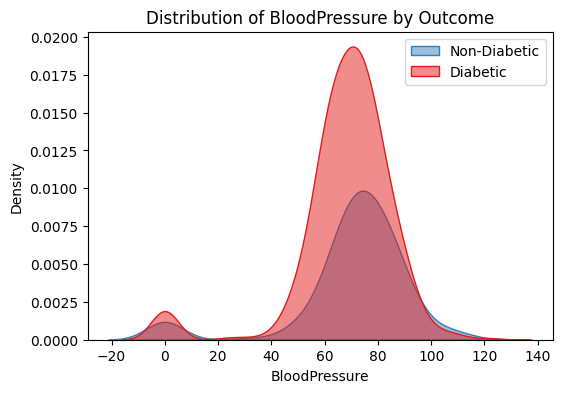

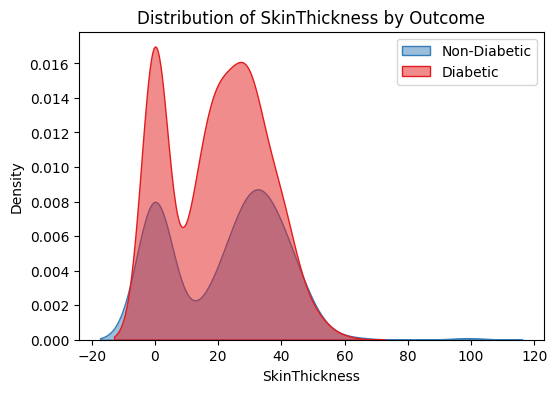

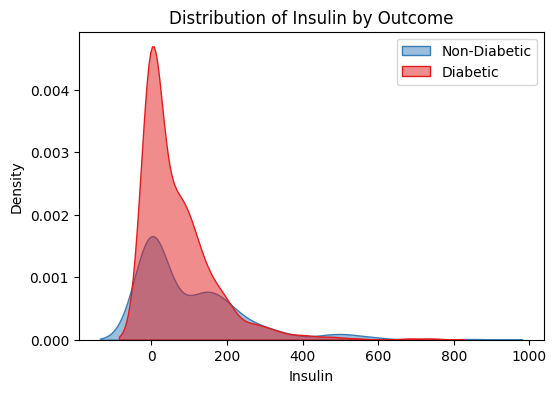

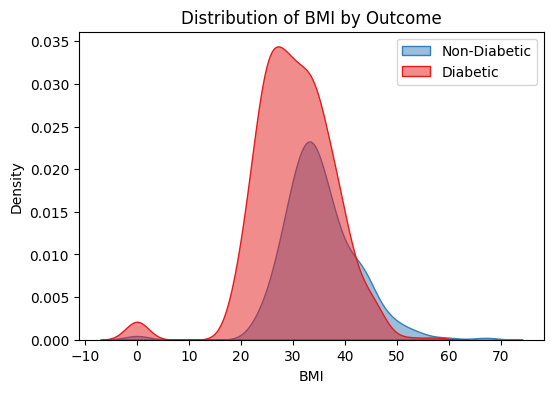

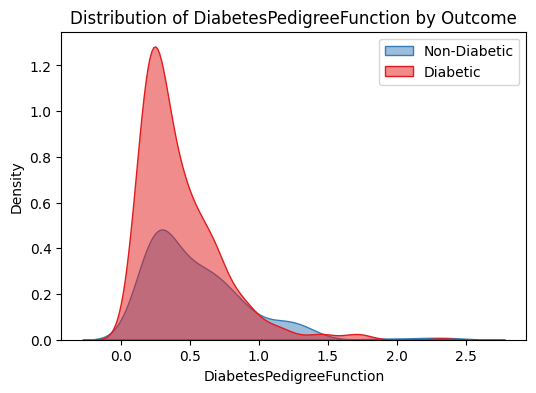

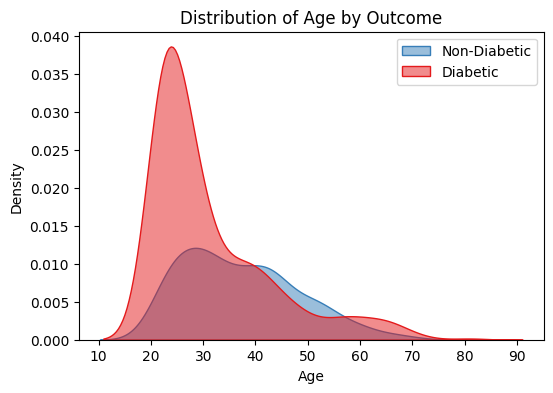

In [ ]:
# Check for missing values
print("\nMissing Values in Each Column:")
print(df.isnull().sum())

# Visualize the distribution of each feature by Outcome
features = df.columns[:-1]  # Exclude 'Outcome'

for feature in features:
    plt.figure(figsize=(6, 4))
    sns.kdeplot(data=df, x=feature, hue="Outcome", fill=True, palette="Set1", alpha=0.5)
    plt.title(f'Distribution of {feature} by Outcome')
    plt.xlabel(feature)
    plt.ylabel('Density')
    plt.legend(['Non-Diabetic', 'Diabetic'])
    plt.show()



In [ ]:
#handling missing coloumns/columns with zero values
# Identify columns where zero is not a valid value
zero_not_valid = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

# Replace zeroes with NaN
df[zero_not_valid] = df[zero_not_valid].replace(0, np.nan)

# Display the number of missing values after replacement
print("\nMissing Values After Replacing Zeroes:")
print(df.isnull().sum())



Missing Values After Replacing Zeroes:
Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


In [ ]:
# Impute missing values with the median of each column
df[zero_not_valid] = df[zero_not_valid].fillna(df[zero_not_valid].median())

# Verify that there are no more missing values
print("\nMissing Values After Imputation:")
print(df.isnull().sum())


Missing Values After Imputation:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [ ]:

# Check for duplicate rows
duplicates = df.duplicated().sum()
print(f"\nNumber of Duplicate Rows: {duplicates}")

# Remove duplicate rows if any
df = df.drop_duplicates()

# Verify removal
print(f"Number of Rows After Removing Duplicates: {df.shape[0]}")


Number of Duplicate Rows: 0
Number of Rows After Removing Duplicates: 768


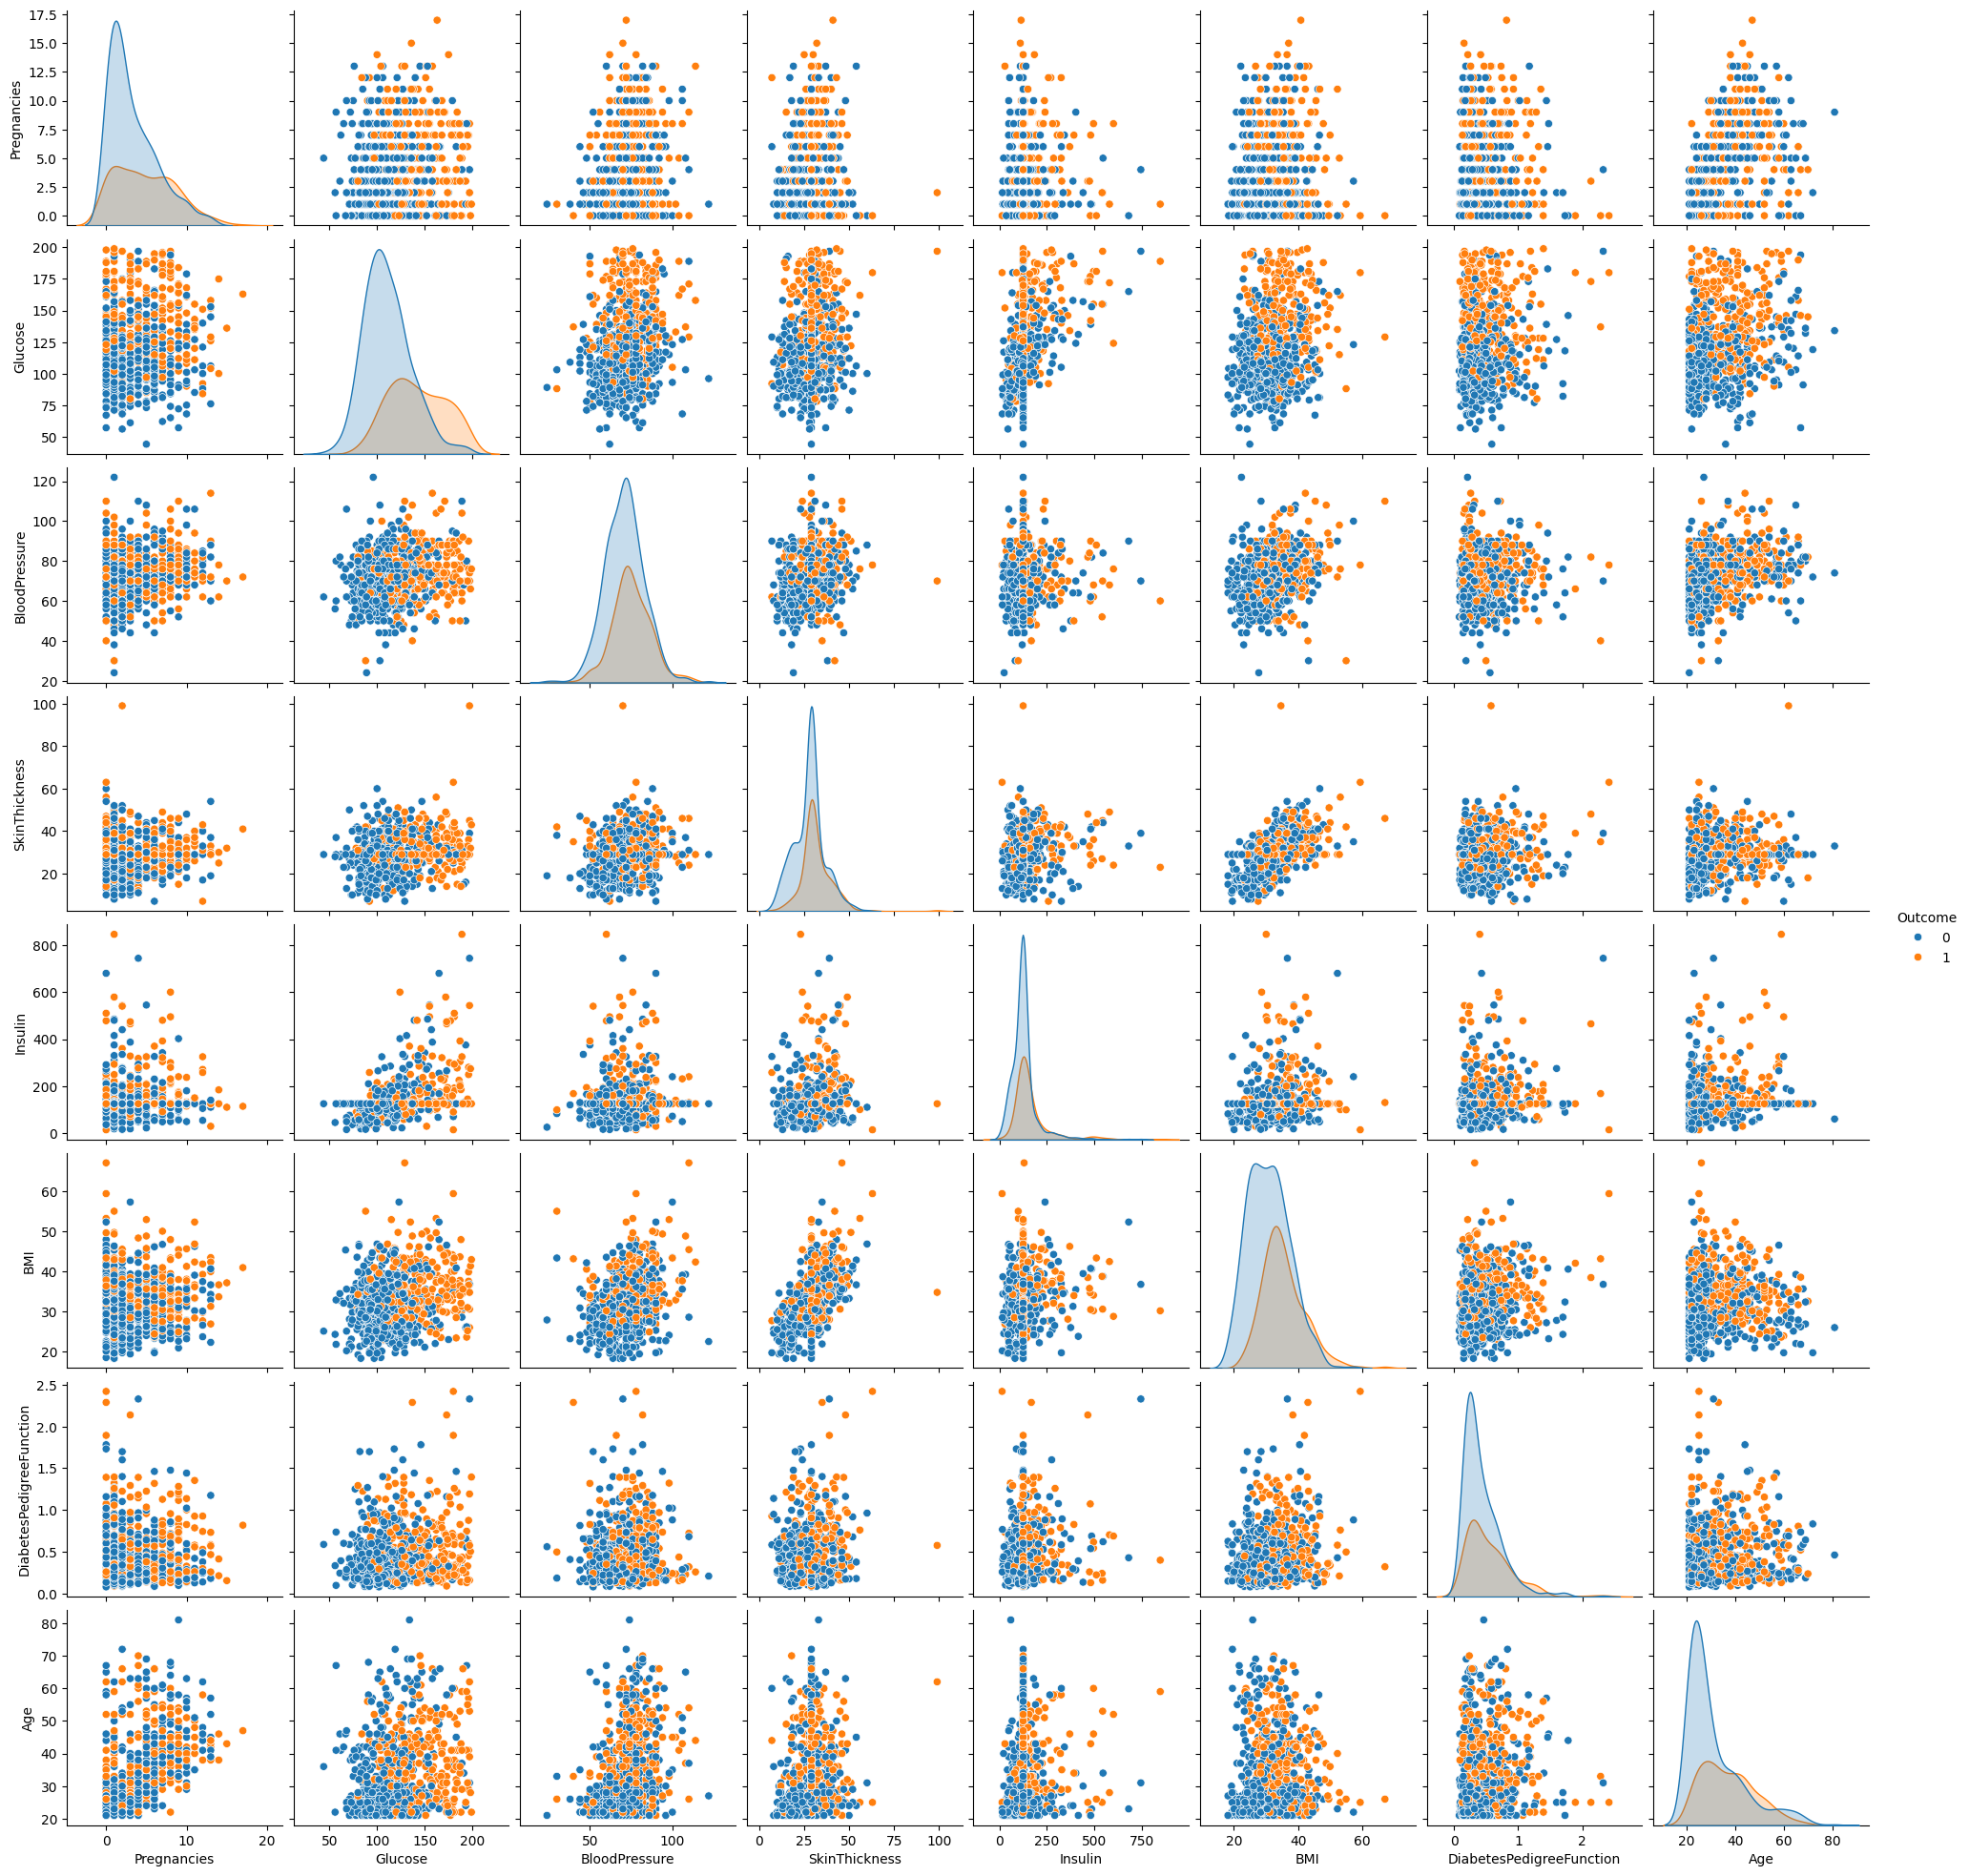

In [ ]:
import seaborn as sns

sns.pairplot(df, hue='Outcome')
plt.show()

In [ ]:

# Separate features and target variable
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the feature data
X_scaled = scaler.fit_transform(X)

# Convert the scaled features back to a DataFrame for easier handling
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

# Display the first few rows of the scaled features
print("\nFirst 5 Rows of Scaled Features:")
print(X_scaled.head())


First 5 Rows of Scaled Features:
   Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0     0.639947  0.866045      -0.031990       0.670643 -0.181541  0.166619   
1    -0.844885 -1.205066      -0.528319      -0.012301 -0.181541 -0.852200   
2     1.233880  2.016662      -0.693761      -0.012301 -0.181541 -1.332500   
3    -0.844885 -1.073567      -0.528319      -0.695245 -0.540642 -0.633881   
4    -1.141852  0.504422      -2.679076       0.670643  0.316566  1.549303   

   DiabetesPedigreeFunction       Age  
0                  0.468492  1.425995  
1                 -0.365061 -0.190672  
2                  0.604397 -0.105584  
3                 -0.920763 -1.041549  
4                  5.484909 -0.020496  


In [ ]:

# Check the distribution of classes
print("\nClass Distribution Before SMOTE:")
print(y.value_counts())

# Initialize SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE to the feature data and target variable
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

# Check the distribution after resampling
print("\nClass Distribution After SMOTE:")
print(pd.Series(y_resampled).value_counts())



Class Distribution Before SMOTE:
Outcome
0    500
1    268
Name: count, dtype: int64

Class Distribution After SMOTE:
Outcome
1    500
0    500
Name: count, dtype: int64


In [ ]:
X_resampled.mean()

,0
Pregnancies,0.056843
Glucose,0.151222
BloodPressure,0.033797
SkinThickness,0.068610
Insulin,0.057221
BMI,0.091551
DiabetesPedigreeFunction,0.050956
Age,0.066679


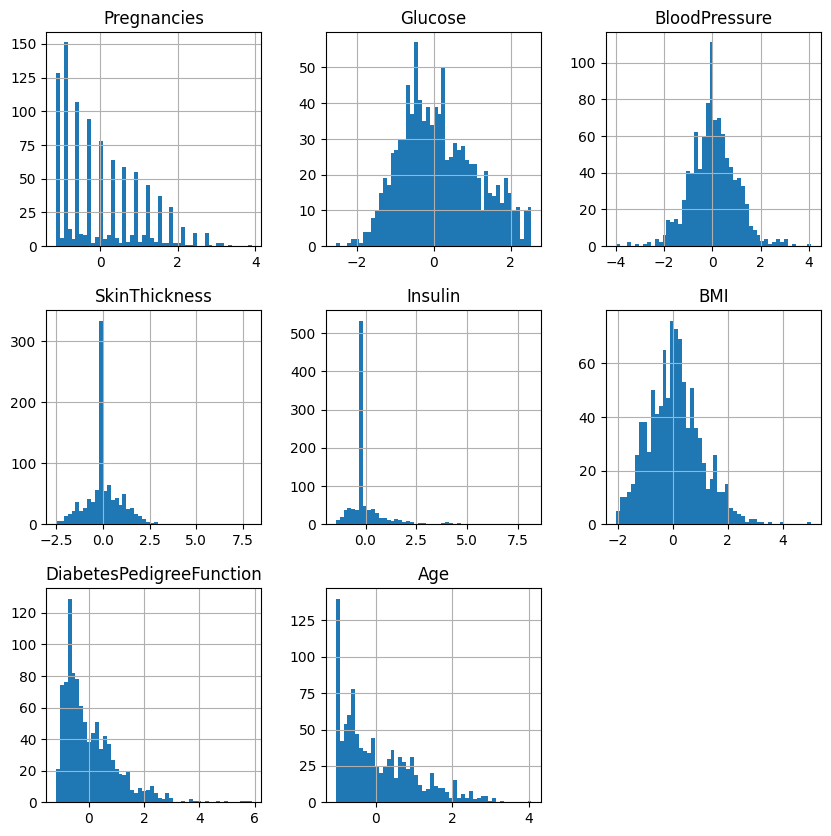

In [ ]:
X_resampled.hist(bins=50, figsize=(7, 7))
plt.show()

<Axes: >

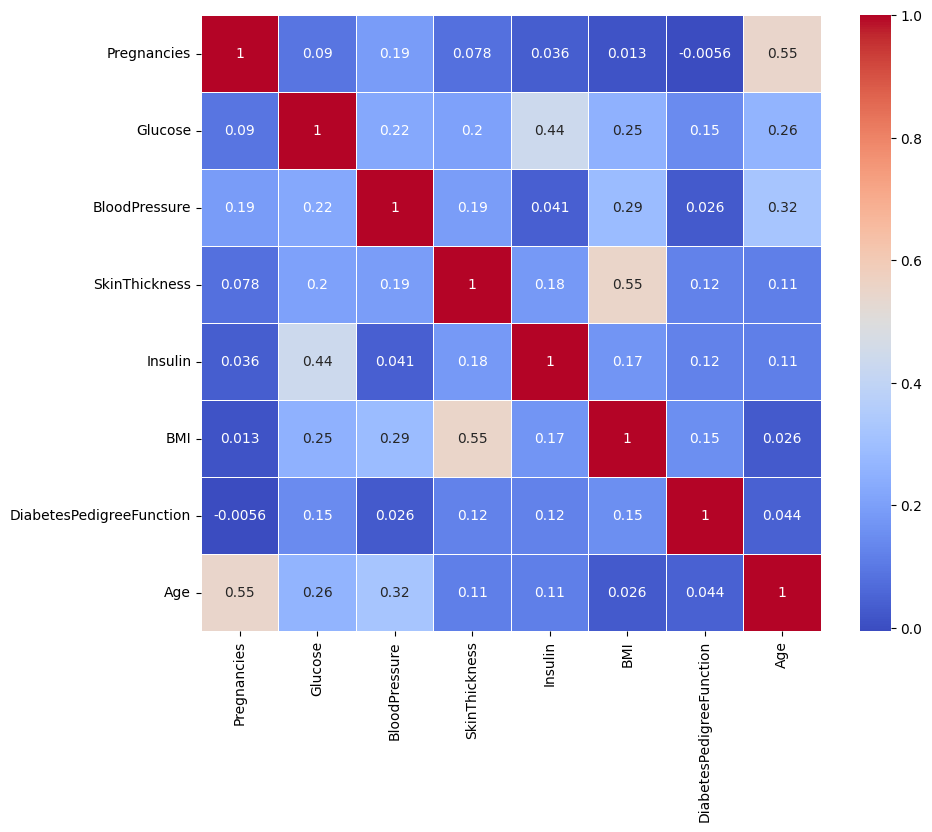

In [ ]:
correlation_matrix = X_resampled.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)

In [ ]:

# Split the resampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled
)

print(f"\nTraining Set Shape: {X_train.shape}")
print(f"Testing Set Shape: {X_test.shape}")



Training Set Shape: (800, 8)
Testing Set Shape: (200, 8)


In [ ]:
# Initialize PolynomialFeatures
poly = PolynomialFeatures(degree=2, include_bias=False)

# Fit and transform the training data
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Create feature names based on the actual number of columns
poly_feature_names = poly.get_feature_names_out(X.columns)
X_train_poly = pd.DataFrame(X_train_poly, columns=poly_feature_names)
X_test_poly = pd.DataFrame(X_test_poly, columns=poly_feature_names)

print("\nNumber of Features After Polynomial Transformation:")
print(X_train_poly.shape[1])

print("\nFirst 5 Rows of Preprocessed Training Data:")
print(X_train_poly.head())



Number of Features After Polynomial Transformation:
44

First 5 Rows of Preprocessed Training Data:
   Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0     0.437922 -0.020230      -1.945654      -0.641295  0.398730 -0.515389   
1    -1.141852  0.504422       0.960667      -0.239949 -0.181541 -0.750318   
2     0.639947  1.326292      -0.859204      -0.012301 -0.181541 -1.186955   
3    -1.141852  0.997544       0.795225       1.125938  1.521290  1.316430   
4     1.090837 -0.037409      -1.600667      -0.405820  0.110240 -0.322725   

   DiabetesPedigreeFunction       Age  Pregnancies^2  Pregnancies Glucose  \
0                  2.887551 -0.020496       0.191776            -0.008859   
1                 -0.727475  2.191785       1.303825            -0.575975   
2                 -0.887541  1.425995       0.409532             0.848757   
3                 -0.609690 -0.531023       1.303825            -1.139047   
4                  2.243580 -0.020496       1


Tuning Logistic Regression...
Fitting 5 folds for each of 48 candidates, totalling 240 fits
Best Parameters for Logistic Regression: {'C': 0.1, 'l1_ratio': 0.5, 'penalty': 'elasticnet', 'solver': 'saga'}

Logistic Regression Results:
Accuracy: 0.7750
ROC-AUC: 0.8593
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.75      0.77       100
           1       0.76      0.80      0.78       100

    accuracy                           0.78       200
   macro avg       0.78      0.78      0.77       200
weighted avg       0.78      0.78      0.77       200



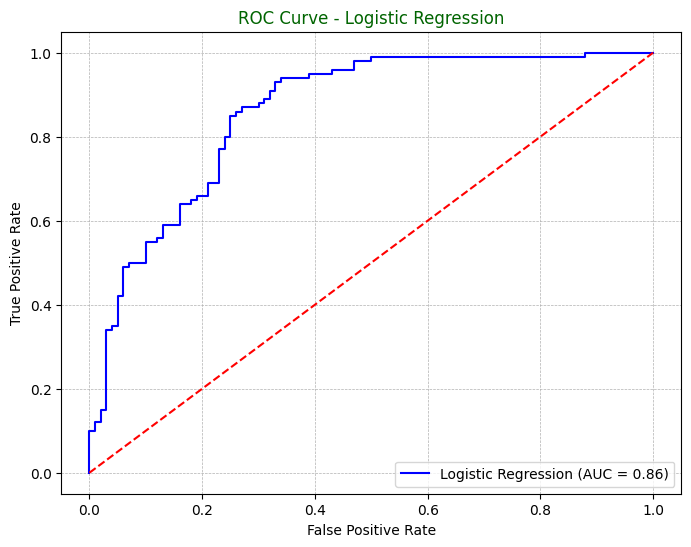

In [ ]:
# Define cross-validation strategy
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

print("\nTuning Logistic Regression...")
param_grid_lr = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'solver': ['saga'],  # 'saga' supports 'elasticnet'
    'l1_ratio': [0, 0.5, 1]  # Only used if penalty is 'elasticnet'
}

lr = LogisticRegression(max_iter=5000)
grid_lr = GridSearchCV(lr, param_grid_lr, cv=cv, scoring='roc_auc', n_jobs=-1, verbose=1)
grid_lr.fit(X_train_poly, y_train)

best_lr = grid_lr.best_estimator_
y_pred_lr = best_lr.predict(X_test_poly)
y_prob_lr = best_lr.predict_proba(X_test_poly)[:, 1]

print(f"Best Parameters for Logistic Regression: {grid_lr.best_params_}")
print("\nLogistic Regression Results:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_lr):.4f}")
print(f"ROC-AUC: {roc_auc_score(y_test, y_prob_lr):.4f}")
print("Classification Report:")
print(classification_report(y_test, y_pred_lr))

# Plot ROC Curve for Logistic Regression
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_prob_lr)
plt.figure(figsize=(8,6))
plt.plot(fpr_lr, tpr_lr, label=f'Logistic Regression (AUC = {roc_auc_score(y_test, y_prob_lr):.2f})', color="blue")
plt.plot([0,1], [0,1], 'k--', color="red")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression', color="darkgreen")
plt.legend(loc='lower right')
plt.grid(True, linestyle='--', linewidth=0.5)
plt.show()


Tuning Support Vector Machine...
Fitting 5 folds for each of 18 candidates, totalling 90 fits
Best Parameters for SVM: {'C': 1, 'class_weight': 'balanced', 'gamma': 'scale', 'kernel': 'rbf'}

Support Vector Machine Results:
Accuracy: 0.7850
ROC-AUC: 0.8658
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.73      0.77       100
           1       0.76      0.84      0.80       100

    accuracy                           0.79       200
   macro avg       0.79      0.78      0.78       200
weighted avg       0.79      0.79      0.78       200



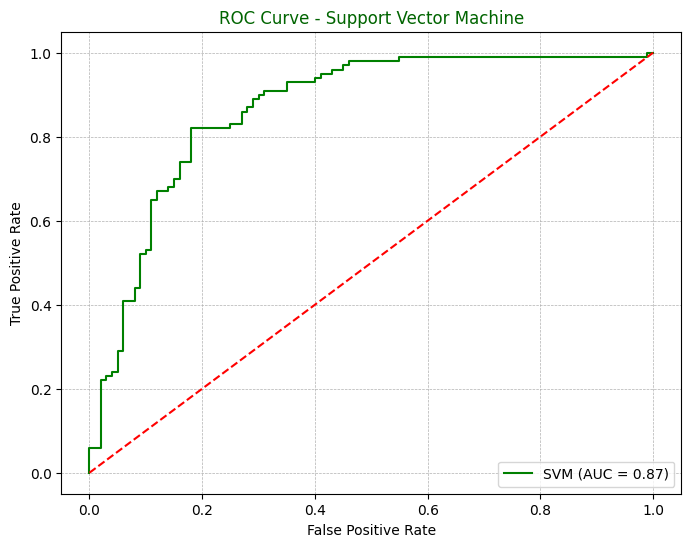

In [ ]:
print("\nTuning Support Vector Machine...")
param_grid_svm = {
    'C': [0.1, 1, 10],
    'kernel': ['rbf', 'poly', 'sigmoid'],
    'gamma': ['scale', 'auto'],
    'class_weight': ['balanced']
}

svm = SVC(probability=True)
grid_svm = GridSearchCV(svm, param_grid_svm, cv=cv, scoring='roc_auc', n_jobs=-1, verbose=1)
grid_svm.fit(X_train_poly, y_train)

best_svm = grid_svm.best_estimator_
y_pred_svm = best_svm.predict(X_test_poly)
y_prob_svm = best_svm.predict_proba(X_test_poly)[:, 1]

print(f"Best Parameters for SVM: {grid_svm.best_params_}")
print("\nSupport Vector Machine Results:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_svm):.4f}")
print(f"ROC-AUC: {roc_auc_score(y_test, y_prob_svm):.4f}")
print("Classification Report:")
print(classification_report(y_test, y_pred_svm))

# Plot ROC Curve for SVM
fpr_svm, tpr_svm, _ = roc_curve(y_test, y_prob_svm)
plt.figure(figsize=(8,6))
plt.plot(fpr_svm, tpr_svm, label=f'SVM (AUC = {roc_auc_score(y_test, y_prob_svm):.2f})', color="green")
plt.plot([0,1], [0,1], 'k--', color="red")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Support Vector Machine', color="darkgreen")
plt.legend(loc='lower right')
plt.grid(True, linestyle='--', linewidth=0.5)
plt.show()


Tuning Gradient Boosting...
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best Parameters for Gradient Boosting: {'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 200, 'subsample': 1.0}

Gradient Boosting Results:
Accuracy: 0.8450
ROC-AUC: 0.8999
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.78      0.83       100
           1       0.81      0.91      0.85       100

    accuracy                           0.84       200
   macro avg       0.85      0.84      0.84       200
weighted avg       0.85      0.84      0.84       200



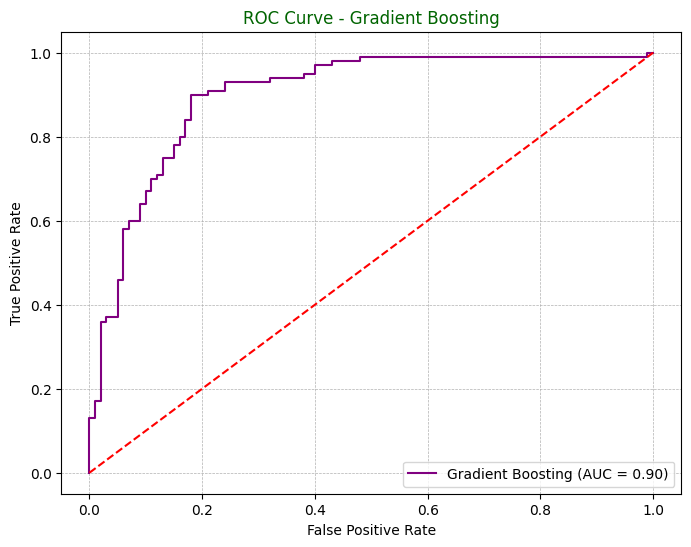

In [ ]:

print("\nTuning Gradient Boosting...")
param_grid_gb = {
    'n_estimators': [100, 200],
    'learning_rate': [0.05, 0.1],
    'max_depth': [3, 5],
    'subsample': [0.8, 1.0]
}

gb = GradientBoostingClassifier(random_state=42)
grid_gb = GridSearchCV(gb, param_grid_gb, cv=cv, scoring='roc_auc', n_jobs=-1, verbose=1)
grid_gb.fit(X_train_poly, y_train)

best_gb = grid_gb.best_estimator_
y_pred_gb = best_gb.predict(X_test_poly)
y_prob_gb = best_gb.predict_proba(X_test_poly)[:, 1]

print(f"Best Parameters for Gradient Boosting: {grid_gb.best_params_}")
print("\nGradient Boosting Results:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_gb):.4f}")
print(f"ROC-AUC: {roc_auc_score(y_test, y_prob_gb):.4f}")
print("Classification Report:")
print(classification_report(y_test, y_pred_gb))

# Plot ROC Curve for Gradient Boosting
fpr_gb, tpr_gb, _ = roc_curve(y_test, y_prob_gb)
plt.figure(figsize=(8,6))
plt.plot(fpr_gb, tpr_gb, label=f'Gradient Boosting (AUC = {roc_auc_score(y_test, y_prob_gb):.2f})', color="purple")
plt.plot([0,1], [0,1], 'k--', color="red")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Gradient Boosting', color="darkgreen")
plt.legend(loc='lower right')
plt.grid(True, linestyle='--', linewidth=0.5)
plt.show()

In [ ]:

print("\nTraining Improved Feedforward Neural Network...")

# Define and compile the enhanced Neural Network
model_nn = tf.keras.Sequential([
    tf.keras.layers.Dense(512, activation='relu', input_shape=(X_train_poly.shape[1],)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(256, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_nn.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005),
                 loss='binary_crossentropy',
                 metrics=['accuracy'])



Training Improved Feedforward Neural Network...


Epoch 1/300
10/10 ━━━━━━━━━━━━━━━━━━━━ 8s 137ms/step - accuracy: 0.5269 - loss: 1.4170 - val_accuracy: 0.6625 - val_loss: 1.1496
Epoch 2/300
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6560 - loss: 1.1706 - val_accuracy: 0.6938 - val_loss: 1.1147
Epoch 3/300
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7294 - loss: 1.0933 - val_accuracy: 0.7375 - val_loss: 1.0884
Epoch 4/300
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7628 - loss: 1.0172 - val_accuracy: 0.7625 - val_loss: 1.0714
Epoch 5/300
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7127 - loss: 1.0654 - val_accuracy: 0.7500 - val_loss: 1.0608
Epoch 6/300
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7477 - loss: 1.0363 - val_accuracy: 0.7750 - val_loss: 1.0516
Epoch 7/300
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8124 - loss: 0.9419 - val_accuracy: 0.7812 - val_loss: 1.0401
Epoch 8/300
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8026 - loss: 0.9489 - val_accuracy: 0.7750 -

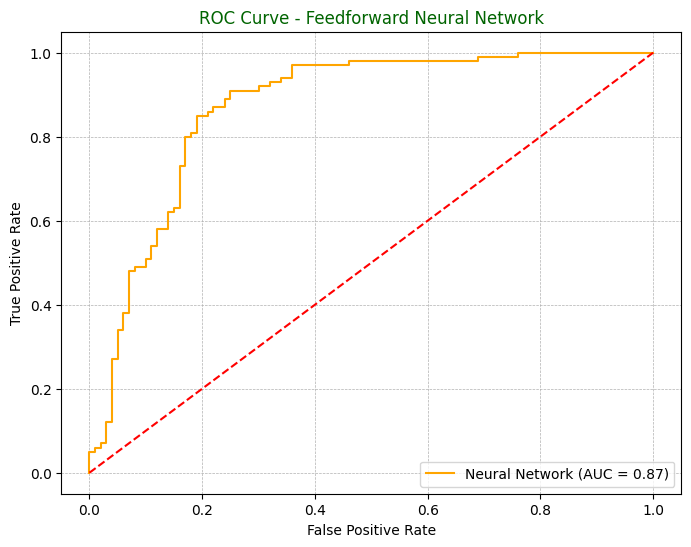

In [ ]:
# Early stopping callback
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)

# Train the Neural Network
history = model_nn.fit(X_train_poly, y_train, validation_split=0.2, epochs=300, batch_size=64, callbacks=[early_stopping], verbose=1)

# Make predictions with Neural Network
y_pred_nn_prob = model_nn.predict(X_test_poly).flatten()
y_pred_nn = (y_pred_nn_prob > 0.5).astype(int)

print("\nFeedforward Neural Network Results:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_nn):.4f}")
print(f"ROC-AUC: {roc_auc_score(y_test, y_pred_nn_prob):.4f}")
print("Classification Report:")
print(classification_report(y_test, y_pred_nn))

# Plot ROC Curve for Neural Network
fpr_nn, tpr_nn, _ = roc_curve(y_test, y_pred_nn_prob)
plt.figure(figsize=(8,6))
plt.plot(fpr_nn, tpr_nn, label=f'Neural Network (AUC = {roc_auc_score(y_test, y_pred_nn_prob):.2f})', color="orange")
plt.plot([0,1], [0,1], 'k--', color="red")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Feedforward Neural Network', color="darkgreen")
plt.legend(loc='lower right')
plt.grid(True, linestyle='--', linewidth=0.5)
plt.show()
